In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/mobile_price_classification.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [5]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


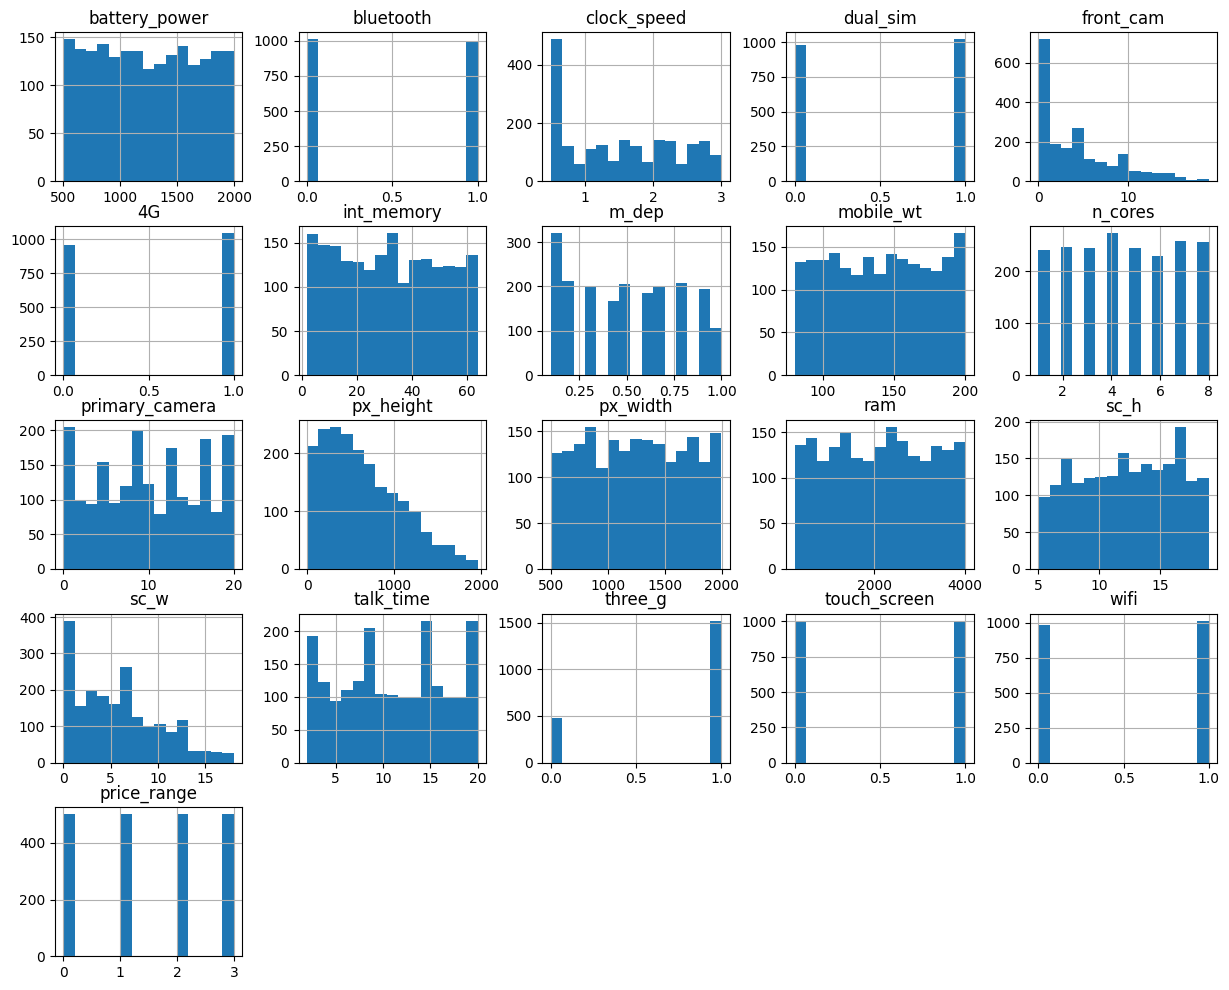

In [56]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [9]:
#divide the data into input and taret
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

In [10]:
#select best features for better result and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [11]:
kbest = SelectKBest(chi2,k=10)

best_feaures = kbest.fit(X,y)

best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
data_features = pd.DataFrame(best_feaures.scores_)
data_columns = pd.DataFrame(X.columns)

In [13]:
featureScores = pd.concat([data_columns,data_features],axis=1)

In [14]:
featureScores.columns = ['Features','Score']


In [15]:
featureScores.sort_values(by='Score')

,Features,Score
17,three_g,0.327643
19,wifi,0.422091
3,dual_sim,0.631011
2,clock_speed,0.648366
1,bluetooth,0.723232
7,m_dep,0.745820
5,4G,1.521572
18,touch_screen,1.928429
9,n_cores,9.097556
10,primary_camera,9.186054


In [16]:
#selcet the features with highest values
X = data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','primary_camera','front_cam']]

In [17]:
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,primary_camera,front_cam
0,2549,20,842,756,188,7,7,19,2,1
1,2631,905,1021,1988,136,53,3,7,6,0
2,2603,1263,563,1716,145,41,2,9,6,2
3,2769,1216,615,1786,131,10,8,11,9,0
4,1411,1208,1821,1212,141,44,2,15,14,13
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,14,0
1996,2032,915,1965,1965,187,39,10,16,3,0
1997,3057,868,1911,1632,108,36,1,5,3,1
1998,869,336,1512,670,145,46,10,19,5,4


In [18]:
X = X.values
y = y.values

In [19]:
(X.shape,y.shape)

((2000, 10), (2000,))

In [20]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
#do one hot encoding in the target column
y = y.reshape(-1,1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [23]:
y = y.toarray()

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Implement Artificial Neural network

In [25]:
pip install tensorflow

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:

model = Sequential()

Train the model

In [28]:

model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
#model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train the model

In [38]:
model.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9659 - loss: 0.0862 - val_accuracy: 0.9545 - val_loss: 0.0858
Epoch 2/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9686 - loss: 0.0838 - val_accuracy: 0.9545 - val_loss: 0.0856
Epoch 3/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9600 - loss: 0.0875 - val_accuracy: 0.9545 - val_loss: 0.0842
Epoch 4/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9717 - loss: 0.0818 - val_accuracy: 0.9561 - val_loss: 0.0830
Epoch 5/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9692 - loss: 0.0780 - val_accuracy: 0.9576 - val_loss: 0.0820
Epoch 6/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9651 - loss: 0.0811 - val_accuracy: 0.9561 - val_loss: 0.0815
Epoch 7/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9699 - loss: 0.0758 - val_accuracy: 0.9576 - val_loss: 0.0801
Epoch 8/105
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9664 - loss: 0.0772 - val_accuracy: 0.

In [31]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


model evaluation

In [32]:
score, accuracy = model.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', accuracy)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.0842
Train score: 0.08480987697839737
Train accuracy: 0.9686567187309265


In [33]:
score, accuracy = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', accuracy)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.0862
Test score: 0.08729469031095505
Test accuracy: 0.9560605883598328


In [34]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       166
           1       0.93      0.96      0.94       147
           2       0.97      0.90      0.93       165
           3       0.96      0.97      0.97       182

   micro avg       0.96      0.96      0.96       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660
 samples avg       0.96      0.96      0.96       660



In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

y_test_single_label = np.argmax(y_test, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_single_label, y_pred_single_label)
cm

array([[165,   1,   0,   0],
       [  6, 141,   0,   0],
       [  0,  10, 148,   7],
       [  0,   0,   5, 177]])

Text(0.5, 23.52222222222222, 'Predicted label')

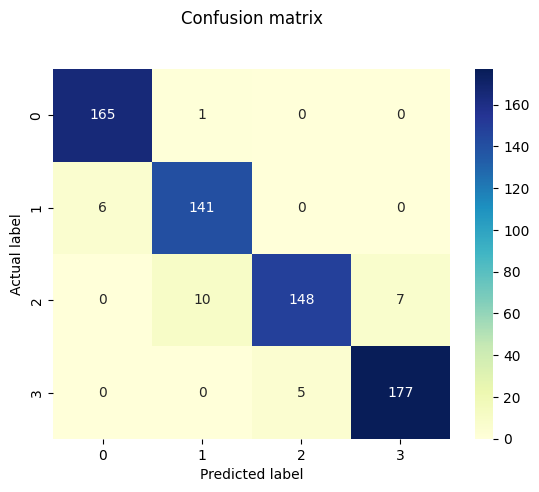

In [47]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
# Summarize the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 170 (680.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342 (1.34 KB)

In [55]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 95.60606060606061
